In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = 'talhabinshahid'
os.environ['KAGGLE_KEY'] = '8bd595d6dd52ffc091ea59c80d359fce'

In [3]:
#!/bin/bash
!kaggle datasets download abrahman97/number-plate-recognition-dataset

Dataset URL: https://www.kaggle.com/datasets/abrahman97/number-plate-recognition-dataset
License(s): unknown


In [4]:
!ls .

number-plate-recognition-dataset.zip


In [5]:
import zipfile

# Replace with the actual path of your zip file
zip_file_path = "/kaggle/working/number-plate-recognition-dataset.zip"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()  # Extracts all files to the current directory

In [6]:
yaml_data = """
path: /kaggle/working
train: train/images
test: test/images
val: valid/images 
nc: 1
names: 
    0 : license_plate
"""

with open("datasets.yaml","w") as file:
    file.write(yaml_data)

In [7]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.7 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found exi

In [8]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 82.4MB/s]


In [9]:
result = model.train(data='datasets.yaml', epochs=40)

Ultralytics 8.3.144 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=

100%|██████████| 755k/755k [00:00<00:00, 17.4MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 75.6MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1168.9±394.9 MB/s, size: 42.4 KB)


train: Scanning /kaggle/working/train/labels... 28107 images, 18 backgrounds, 0 corrupt: 100%|██████████| 28107/28107 [00:18<00:00, 1520.12it/s]


train: New cache created: /kaggle/working/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 467.7±240.5 MB/s, size: 21.5 KB)


val: Scanning /kaggle/working/valid/labels... 3766 images, 1 backgrounds, 0 corrupt: 100%|██████████| 3766/3766 [00:02<00:00, 1483.83it/s]


val: New cache created: /kaggle/working/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      2.01G      1.264      1.522      1.154         17        640: 100%|██████████| 1757/1757 [04:47<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:22<00:00,  5.23it/s]


                   all       3766       4594      0.895      0.779      0.847      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      2.55G      1.264     0.8402      1.151         12        640: 100%|██████████| 1757/1757 [04:39<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.58it/s]


                   all       3766       4594      0.888      0.776      0.845      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      2.55G      1.309     0.8401      1.189         16        640: 100%|██████████| 1757/1757 [04:37<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.48it/s]


                   all       3766       4594      0.867      0.708      0.802      0.462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      2.55G      1.319     0.8255      1.206         22        640: 100%|██████████| 1757/1757 [04:37<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:20<00:00,  5.64it/s]


                   all       3766       4594      0.886      0.756      0.837      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      2.56G      1.282     0.7663      1.191         21        640: 100%|██████████| 1757/1757 [04:37<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.55it/s]


                   all       3766       4594      0.898      0.796      0.871      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      2.57G      1.248     0.7137      1.169         13        640: 100%|██████████| 1757/1757 [04:36<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.56it/s]

                   all       3766       4594      0.912      0.818      0.888      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      2.59G      1.231     0.6885      1.158         18        640: 100%|██████████| 1757/1757 [04:37<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.49it/s]

                   all       3766       4594      0.911      0.838      0.895      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40       2.6G      1.214     0.6629      1.147         16        640: 100%|██████████| 1757/1757 [04:40<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.61it/s]

                   all       3766       4594      0.915      0.835        0.9      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      2.61G      1.203     0.6425      1.147         19        640: 100%|██████████| 1757/1757 [04:39<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.52it/s]

                   all       3766       4594      0.919      0.836      0.904      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      2.62G      1.194     0.6329       1.14         15        640: 100%|██████████| 1757/1757 [04:37<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.55it/s]

                   all       3766       4594      0.914      0.862      0.909      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      2.63G      1.182     0.6133      1.134         19        640: 100%|██████████| 1757/1757 [04:36<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.59it/s]

                   all       3766       4594      0.915      0.861      0.912      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      2.64G      1.167      0.608      1.125         22        640: 100%|██████████| 1757/1757 [04:37<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.62it/s]

                   all       3766       4594      0.915      0.868      0.916      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      2.65G      1.169     0.5982      1.126         22        640: 100%|██████████| 1757/1757 [04:38<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.53it/s]

                   all       3766       4594      0.915      0.868      0.916      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      2.67G      1.158     0.5861      1.117         19        640: 100%|██████████| 1757/1757 [04:36<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.57it/s]

                   all       3766       4594      0.905      0.876      0.916      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      2.68G      1.144     0.5765      1.116         15        640: 100%|██████████| 1757/1757 [04:38<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.54it/s]

                   all       3766       4594      0.916      0.878      0.922      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      2.69G      1.143     0.5694      1.114         17        640: 100%|██████████| 1757/1757 [04:38<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.55it/s]

                   all       3766       4594      0.916      0.877      0.921        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40       2.7G      1.142     0.5686      1.111         25        640: 100%|██████████| 1757/1757 [04:37<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.56it/s]

                   all       3766       4594      0.922      0.871      0.921      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      2.71G       1.13       0.56      1.107         11        640: 100%|██████████| 1757/1757 [04:36<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.57it/s]

                   all       3766       4594      0.919      0.875      0.921      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      2.72G      1.124     0.5515      1.105         20        640: 100%|██████████| 1757/1757 [04:38<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.57it/s]

                   all       3766       4594      0.917      0.878      0.923      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      2.73G      1.118     0.5449        1.1         20        640: 100%|██████████| 1757/1757 [04:39<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.55it/s]

                   all       3766       4594      0.922      0.876      0.926      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      2.75G      1.114     0.5396      1.097         20        640: 100%|██████████| 1757/1757 [04:40<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.55it/s]

                   all       3766       4594      0.927      0.879      0.927      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      2.76G      1.107     0.5294      1.091         18        640: 100%|██████████| 1757/1757 [04:40<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:20<00:00,  5.64it/s]

                   all       3766       4594      0.919      0.884      0.924      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      2.77G      1.103     0.5286      1.091         16        640: 100%|██████████| 1757/1757 [04:39<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:20<00:00,  5.64it/s]

                   all       3766       4594      0.923      0.883      0.925      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      2.78G      1.096     0.5234      1.088         19        640: 100%|██████████| 1757/1757 [04:37<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.58it/s]

                   all       3766       4594      0.923      0.882      0.928      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      2.79G       1.09     0.5158      1.084         22        640: 100%|██████████| 1757/1757 [04:37<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.57it/s]

                   all       3766       4594      0.924      0.884      0.929      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40       2.8G      1.089     0.5143      1.083         12        640: 100%|██████████| 1757/1757 [04:36<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.61it/s]

                   all       3766       4594       0.92      0.883       0.93      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      2.81G      1.091     0.5099      1.081         19        640: 100%|██████████| 1757/1757 [04:36<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:20<00:00,  5.64it/s]

                   all       3766       4594       0.92      0.888       0.93      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      2.83G      1.074     0.5004      1.076         22        640: 100%|██████████| 1757/1757 [04:37<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.61it/s]

                   all       3766       4594       0.92      0.888       0.93      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      2.84G       1.07     0.4977      1.073         14        640: 100%|██████████| 1757/1757 [04:36<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.55it/s]

                   all       3766       4594      0.923      0.885       0.93      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      2.85G      1.064     0.4923      1.073         19        640: 100%|██████████| 1757/1757 [04:35<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:20<00:00,  5.66it/s]

                   all       3766       4594      0.927      0.884       0.93      0.618


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      2.86G      1.059     0.4449      1.093         12        640: 100%|██████████| 1757/1757 [04:31<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:20<00:00,  5.67it/s]

                   all       3766       4594      0.926      0.885      0.931      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      2.87G      1.048     0.4396      1.088         12        640: 100%|██████████| 1757/1757 [04:31<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:20<00:00,  5.67it/s]

                   all       3766       4594      0.927      0.883      0.931       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      2.88G      1.036     0.4282      1.083         12        640: 100%|██████████| 1757/1757 [04:31<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:20<00:00,  5.64it/s]

                   all       3766       4594      0.926      0.885      0.931       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      2.89G      1.028     0.4221       1.08         13        640: 100%|██████████| 1757/1757 [04:31<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.60it/s]

                   all       3766       4594      0.925      0.886      0.931       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      2.91G      1.018     0.4149      1.073         13        640: 100%|██████████| 1757/1757 [04:31<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.60it/s]

                   all       3766       4594      0.924      0.888      0.932      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      2.92G      1.011     0.4092       1.07         12        640: 100%|██████████| 1757/1757 [04:31<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.55it/s]

                   all       3766       4594      0.922      0.889      0.933      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      2.93G      1.003     0.4052      1.065         11        640: 100%|██████████| 1757/1757 [04:31<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.59it/s]

                   all       3766       4594      0.923      0.889      0.933      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      2.94G     0.9941     0.3976      1.062         13        640: 100%|██████████| 1757/1757 [04:31<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.57it/s]

                   all       3766       4594      0.924       0.89      0.933      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      2.95G     0.9873     0.3914      1.058         14        640: 100%|██████████| 1757/1757 [04:31<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.56it/s]

                   all       3766       4594      0.923      0.891      0.933      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      2.96G     0.9793     0.3866      1.055         10        640: 100%|██████████| 1757/1757 [04:31<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:21<00:00,  5.61it/s]

                   all       3766       4594      0.924       0.89      0.934      0.622



40 epochs completed in 3.309 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.144 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:22<00:00,  5.27it/s]


                   all       3766       4594      0.924      0.889      0.933      0.622


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


In [11]:
model.save('nbr-model.pt')

In [15]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [16]:
model=YOLO('/kaggle/working/nbr-model.pt')

In [17]:
metrics = model.val(data='datasets.yaml')

Ultralytics 8.3.144 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 628.7±164.6 MB/s, size: 24.7 KB)


val: Scanning /kaggle/working/valid/labels.cache... 3766 images, 1 backgrounds, 0 corrupt: 100%|██████████| 3766/3766 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 236/236 [00:28<00:00,  8.32it/s]


                   all       3766       4594      0.923      0.889      0.932      0.622


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 3.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val2


In [20]:
import numpy as np

In [22]:
# Access metrics as attributes (not methods)
precision = metrics.box.mp
recall = metrics.box.mr
map50 = metrics.box.map50
map5095 = metrics.box.map

# Print the values
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"mAP@0.5: {map50:.4f}")
print(f"mAP@0.5:0.95: {map5095:.4f}")


Precision: 0.9232
Recall: 0.8894
mAP@0.5: 0.9318
mAP@0.5:0.95: 0.6220


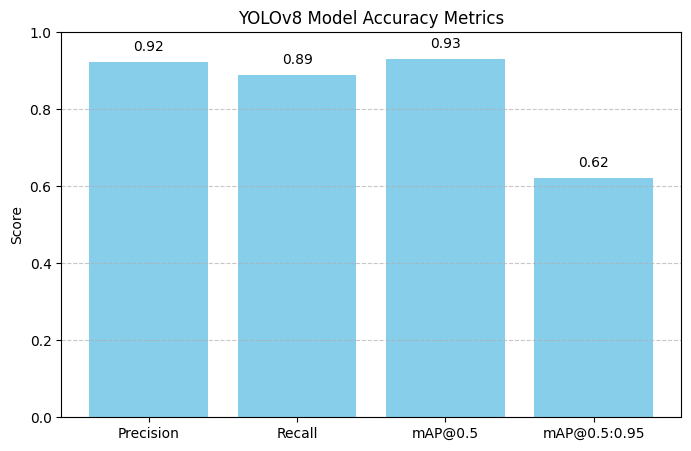

In [23]:
import matplotlib.pyplot as plt
import numpy as np

metric_names = ['Precision', 'Recall', 'mAP@0.5', 'mAP@0.5:0.95']
metric_values = np.nan_to_num([precision, recall, map50, map5095])

plt.figure(figsize=(8, 5))
bars = plt.bar(metric_names, metric_values, color='skyblue')
plt.title('YOLOv8 Model Accuracy Metrics')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom')

plt.show()
